MP Phase 1 and 2 S13
- Cheng, Jhervey Edric
- de Nieva, Johan Oswin
- Kok, James Patrick

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import sklearn as sk
import plotly.express as px
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import norm
from scipy.stats import ttest_ind
from matplotlib import rc
plt.rcParams["font.family"] = "serif"

# Dataset Description
Valorant is a first-person tactical shooter game developed by Riot Games. Each game would have 2 teams consisting of 5 players each with the main objective of eliminating the other team, or detonating a bomb, called spike, or defusing the spike depending on the side. Moreover, players may select characters, called agents, all of which have different abilities. Players may choose which gun to use for each round and the first team to win 13 rounds wins the game.
## Valorant Leaderboard Statistics
The dataset contains various data of the highest-ranked players in the game. It contains the "leaderboard" or the best performing players in the ranked or competitive scene. The datset is obtained from kaggle in this [link](https://www.kaggle.com/datasets/aliibrahim10/valorant-stats). According to Ali Ibrahim, the author of the dataset, he was able to web scrape and obtain the data from [tracker.gg](https://tracker.gg/valorant), a website where one can search for a player username and retrieve statistical numbers on the players. It is one of the most widely-used statistics tracker for games. Moreover, he indicated that the data obtained was specifically Episode 4: Act 3, a specific 3-month period "season" for the game. These imply that the data obtained is reliable even though it was last updated 6 months ago since the data is enclosed in a specific timeframe.
## Structure of Dataset
The dataset from kaggle contains only 1 csv file with 38 columns and 85678 rows. Each row in this dataset corresponds to one unique player of the game. Each column, on the other hand, is a variable showing a detail of the player. Each variable will be discussed in the next section.
## Variables in the Dataset
This section describes and discusses each variable and column in the dataset.
- **region** - describes what region the player comes from. There are six regions that a player comes from: *NA* = North America, *EU* = Europe, *AP* = Asia Pacific, *KR* = Korea, *BR* = Brazil, *LAT* = Latin America.
- **name** and **tag** - a unique pair that identifies each player, like a username.
- **rating** - the term used for the rank of a player. Since the dataset is a leaderboard, this should only contain the highest-ranks. *Radiant* is the highest possible rank, followed by *Immortal 3*, *Immortal 2* and *Immortal 1*. According to the author, these are the possible values for the column except for some inactive players which would have *unrated* 
- **damage_round** - average damage done per round in all of the player's games. 
- **headshots** - the total number of headshots done by the player in all games.
- **headshot_percent** - the percentage of headshots in all of the shots hit by the player
- **aces** - the total number of *aces* performed by the playerthis act, a round where the player kills all 5 enemies.
- **clutches** - the total number of *clutches* performed by the player this act, a situation where the round was won by the last player alive on the team. 
- **flawless** - the total number of *flawless* rounds of the player this act, a winning round outcome where all 5 players of the team are alive. 
- **first_bloods** - the total number of *first bloods* of the player this act, which describes where the player gets the first kill of the round.
- **kills** - the total number of *kills* of the player in all games.
- **deaths** - the total number of *deaths* of the player in all games.
- **assists** - the total number of *assists* of the player in all games.
- **kd_ratio** - kill to death ratio of the player this act. Calculated by the formula *kills/deaths*
- **kills_round** - average number of kills per round of the player this act.
- **most_kills** - most kills done by the player within one game this act.
- **score_round** - average score per round of the player over all games this act. *Score* is a numerical value in the game calculated with a specific formula based on damage dealt and kills of the player.
- **wins** - total number of wins of the player this act.
- **win_percent** - win rate of the player this act. This is calculated by *number of wins / number of games*
- **agent_1** - most played agent of the player based on hours played.
- **agent_2** - second most played agent of the player based on hours played.
- **agent_3** - third most played agent of the player based on hours played.
- **gun1_name** - a player's best gun based on kills
- **gun1_head** - percentage of gun 1's total hit shots that are headshots
- **gun1_body** - percentage of gun 1's total hit shots that are bodyshots
- **gun1_legs** - percentage of gun 1's total hit shots that are legshots
- **gun1_kills** - total kills with gun 1 this act
- **gun2_name** - a player's second best gun based on kills
- **gun2_head** - percentage of gun 2's total hit shots that are headshots
- **gun2_body** - percentage of gun 2's total hit shots that are bodyshots
- **gun2_legs** - percentage of gun 2's total hit shots that are legshots
- **gun2_kills** - total kills with gun 2 this act
- **gun3_name** - a player's third best gun based on kills
- **gun3_head** - percentage of gun 3's total hit shots that are headshots
- **gun3_body** - percentage of gun 3's total hit shots that are bodyshots
- **gun3_legs** - percentage of gun 3's total hit shots that are legshots
- **gun3_kills** - total kills with gun 3 this act

# Data Cleaning

## Null Values 
To start on the dataset, we check if there are null values.

In [2]:
valorant_df = pd.read_csv('val_stats.csv', keep_default_na=False)
valorant_df = valorant_df.replace('',np.nan)

print(valorant_df[~valorant_df.isnull()].count())

C:\Users\Burger Truck\AppData\Local\Temp\ipykernel_7132\3017469455.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  valorant_df = pd.read_csv('val_stats.csv', keep_default_na=False)


region              85678
name                85676
tag                 85358
rating              85678
damage_round        85678
headshots           85678
headshot_percent    85678
aces                85678
clutches            85678
flawless            85678
first_bloods        85678
kills               85678
deaths              85678
assists             85678
kd_ratio            85678
kills_round         85678
most_kills          85678
score_round         85678
wins                85678
win_percent         85678
agent_1             85678
agent_2             83691
agent_3             80461
gun1_name           85678
gun1_head           85678
gun1_body           85678
gun1_legs           85678
gun1_kills          85678
gun2_name           85678
gun2_head           85678
gun2_body           85678
gun2_legs           85678
gun2_kills          85678
gun3_name           85678
gun3_head           85678
gun3_body           85678
gun3_legs           85678
gun3_kills          85678
dtype: int64

Upon examining the dataset, it was found that there are some variables with null values, these include: name, tag, agent_2, and agent_3. 
### Name and Tag
We first check the rows where one or both variables (name and tag) are null.

In [3]:
print(valorant_df[valorant_df[['name','tag']].isnull().all(axis = 1)])

print(valorant_df[valorant_df['tag'].isnull()][['name','tag']].head())
valorant_df = valorant_df.dropna(subset=['name', 'tag'], how = 'all')
valorant_df = valorant_df.reset_index(drop=True)
newCols = pd.DataFrame({'name':[w.split("#")[0] for w in valorant_df['name']],'tag':["#"+ w.split("#")[1] if "#" in w else x  for (w,x) in valorant_df[['name','tag']].itertuples(index = False)    ]})
newCols
print(newCols[~newCols.isnull()].count())
valorant_df['name'] = newCols['name']
valorant_df['tag'] = newCols['tag']

      region name  tag      rating  damage_round headshots  headshot_percent  \
24453     EU  NaN  NaN  Immortal 1         152.2        17              22.5   
63603     AP  NaN  NaN      Gold 3         115.7       257              18.2   

       aces  clutches  flawless  ... gun2_name gun2_head gun2_body gun2_legs  \
24453     0         4         1  ...     Ghost        60        20        20   
63603     0        52        28  ...   Classic        39        58         3   

       gun2_kills  gun3_name  gun3_head  gun3_body  gun3_legs  gun3_kills  
24453           3    Spectre          8         85          8           3  
63603          47    Phantom         24         68          8          39  

[2 rows x 38 columns]
                     name  tag
304   Wilma Caukfit#fk no  NaN
1005          ylang#Luv U  NaN
1059            pup#ARI G  NaN
1371        jawniss#luv u  NaN
1581       LFT Comfy#NA 1  NaN
name    85676
tag     85676
dtype: int64


For name and tag, different cases were explored.
1. Rows where **both name and tag** were null are first dropped since there is no way to identify the player, resulting in 2 dropped rows. 
2. There are some rows where the tag was null, and upon examining some of these rows, it was found that some of the tags were in the name column. These tags were then extracted from the name column to the tag column.

In [4]:
print(valorant_df[~valorant_df.isnull()].count())

region              85676
name                85676
tag                 85676
rating              85676
damage_round        85676
headshots           85676
headshot_percent    85676
aces                85676
clutches            85676
flawless            85676
first_bloods        85676
kills               85676
deaths              85676
assists             85676
kd_ratio            85676
kills_round         85676
most_kills          85676
score_round         85676
wins                85676
win_percent         85676
agent_1             85676
agent_2             83689
agent_3             80460
gun1_name           85676
gun1_head           85676
gun1_body           85676
gun1_legs           85676
gun1_kills          85676
gun2_name           85676
gun2_head           85676
gun2_body           85676
gun2_legs           85676
gun2_kills          85676
gun3_name           85676
gun3_head           85676
gun3_body           85676
gun3_legs           85676
gun3_kills          85676
dtype: int64

For the agent_2 and agent_3 variables, it is acceptable for there to be null values since there are some players who only use 1 or 2 agents. Hence, there is no need to clean them. 

With these, there are 85676 valid entries remaining.

## Incorrect Data Types
This section examines whether all data types are appropriate for the variable.

In [5]:
print("Printing valorant_df info...")
print(valorant_df.info())

Printing valorant_df info...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85676 entries, 0 to 85675
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            85676 non-null  object 
 1   name              85676 non-null  object 
 2   tag               85676 non-null  object 
 3   rating            85676 non-null  object 
 4   damage_round      85676 non-null  float64
 5   headshots         85676 non-null  object 
 6   headshot_percent  85676 non-null  float64
 7   aces              85676 non-null  int64  
 8   clutches          85676 non-null  int64  
 9   flawless          85676 non-null  int64  
 10  first_bloods      85676 non-null  object 
 11  kills             85676 non-null  object 
 12  deaths            85676 non-null  object 
 13  assists           85676 non-null  object 
 14  kd_ratio          85676 non-null  float64
 15  kills_round       85676 non-null  float64
 16  most_kills 

Upon examining, we can see incorrect variables, this includes headshots, first_bloods, kills, deaths, assists, gun1_kills, and gun2_kills, which all have a data type of object, but for these variables, a datatype of int would be more appropriate. After examining some of the values of these variables, it was found that values greater than or equal to 1000 had a comma and thus were treated as strings. To fix this, commas were removed from these values and were then converted to int64. 

In [6]:
copy_df = valorant_df.copy()
wrongIntDTypes = ['headshots', 'first_bloods', 'kills','deaths','assists','gun1_kills','gun2_kills']
print("\nPrinting valorant_df head for wrong variables...")
print(valorant_df[wrongIntDTypes].head())
for column in wrongIntDTypes:
    copy_df[column] = copy_df[column].astype('string')
    copy_df[column] = copy_df[column].str.replace(',','')
    copy_df[column] = copy_df[column].astype(np.int64)
print("\nvalorant_df info after converting to int:")
copy_df.info()

valorant_df = copy_df


Printing valorant_df head for wrong variables...
  headshots first_bloods  kills deaths assists gun1_kills gun2_kills
0       992          161  1,506  1,408     703        802        220
1       879          316  1,608  1,187     206        689        226
2       720          216  1,115  1,064     267        444        231
3       856          235  1,134    812     157        754         48
4       534          137    869    781     213        419         65

valorant_df info after converting to int:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85676 entries, 0 to 85675
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            85676 non-null  object 
 1   name              85676 non-null  object 
 2   tag               85676 non-null  object 
 3   rating            85676 non-null  object 
 4   damage_round      85676 non-null  float64
 5   headshots         85676 non-null  int64  
 6   hea

## Invalid Ranks
Since the dataset obtained is the leaderboard of the game, the ranks of the entries should be at the highest. In valorant, the leaderboard only consists of Radiant and Immortal ranks. However, in the dataset, there are entries that are neither of the said ranks, specifically their rank is below the lowest possible rank for Immortal, Immortal 1. Since these rows are not supposed to be included in the leaderboards, they were dropped from the dataframe. 


In [7]:
#print rows with non immortal/radiant ranks
valorant_df['rating'].value_counts()
validRanks = ['Immortal 1', 'Immortal 2', 'Immortal 3','Radiant']

valorant_df = valorant_df[valorant_df['rating'].isin(validRanks)]
valorant_df
valorant_df['rating'].value_counts()

Immortal 1    51314
Immortal 2    20716
Immortal 3    10936
Radiant        2607
Name: rating, dtype: int64

## Invalid Values
To ensure the validity of categorical data, invalid values were also checked for the variables agent_1, agent_2, agent_3, gun1_name, gun2_name, gun3_name, and region. Upon printing the unique values for the said variables, no invalid values were fround. 

In [8]:
#double check for invalid data- agent names
print(valorant_df['agent_1'].unique())
print(valorant_df['agent_2'].unique())
print(valorant_df['agent_3'].unique())

#double check for invalid data- gun names
print(valorant_df['gun1_name'].unique())
print(valorant_df['gun2_name'].unique())
print(valorant_df['gun3_name'].unique())

print(valorant_df['rating'].unique())
print(valorant_df['region'].unique())


#check for NaN region, name, tag, rating



['Fade' 'Chamber' 'Yoru' 'Jett' 'Sage' 'KAY/O' 'Sova' 'Raze' 'Omen'
 'Breach' 'Reyna' 'Neon' 'Skye' 'Viper' 'Brimstone' 'Phoenix' 'Astra'
 'Killjoy' 'Cypher']
['Viper' 'Jett' 'Chamber' 'Raze' 'Sova' 'Fade' 'Reyna' 'Skye' 'Omen'
 'Neon' 'KAY/O' 'Brimstone' nan 'Sage' 'Cypher' 'Astra' 'Killjoy' 'Breach'
 'Yoru' 'Phoenix']
['Omen' 'Raze' 'Chamber' 'KAY/O' 'Sova' 'Sage' 'Jett' 'Reyna' 'Viper'
 'Neon' 'Fade' nan 'Skye' 'Brimstone' 'Breach' 'Killjoy' 'Cypher' 'Astra'
 'Yoru' 'Phoenix']
['Vandal' 'Operator' 'Phantom' 'Judge' 'Odin' 'Guardian' 'Spectre'
 'Classic' 'Ghost' 'Sheriff' 'Marshal' 'Shorty' 'Bulldog' 'Ares' 'Frenzy'
 'Bucky']
['Phantom' 'Operator' 'Sheriff' 'Spectre' 'Vandal' 'Classic' 'Ghost'
 'Bulldog' 'Marshal' 'Judge' 'Odin' 'Guardian' 'Frenzy' 'Shorty' 'Bucky'
 'Ares' 'Stinger' 'Melee']
['Classic' 'Phantom' 'Operator' 'Spectre' 'Sheriff' 'Marshal' 'Ghost'
 'Stinger' 'Judge' 'Shorty' 'Frenzy' 'Odin' 'Bulldog' 'Guardian' 'Vandal'
 'Ares' 'Bucky' 'Melee']
['Radiant' 'Immortal 3' 'I

## Duplicate Values
After examining the dataset, 2042 duplicate rows have been found where all columns have the exact same values. For this case, only one entry for each duplicate was kept while the others were dropped. 

After dropping the duplicate rows, 1038 duplicate accounts where still found (rows with same name and tag). This should not be possible since the name and tag pair of the game should be unique globally. These duplicates mean that there is atleast one column that is different for the said entries. Because there is no feasible way to confirm which one of the duplicate values is correct, it was decided to simply drop all rows with duplicate names and values. This still leaves the dataset with a sufficient number of 83457 observations to work with. 

In [9]:
#Check for duplicate rows
duplicate = valorant_df[valorant_df.duplicated(keep = False)]
print("Duplicate Rows: "+ str(duplicate.shape[0]))
valorant_df = valorant_df.drop_duplicates(keep = 'first')

print("Dropping Duplicate Rows... (Keep First)")

duplicate = valorant_df[valorant_df.duplicated(['name', 'tag'], keep = False)]
print("\nDuplicate Accounts: "+ str(duplicate.shape[0]))
print("Dropping Rows with Duplicate Accounts...")
valorant_df = valorant_df.drop_duplicates(['name','tag'], keep = False)

print("\nRows Remaining: "+str(valorant_df.shape[0]))

Duplicate Rows: 2042
Dropping Duplicate Rows... (Keep First)

Duplicate Accounts: 1038
Dropping Rows with Duplicate Accounts...

Rows Remaining: 83457


## Filtering Players

Finally, there are cases wherein a player only played a single game thoughout the given timeframe. This would often fluctuate the dataset. An example would be a player winning one game will have 100% winrate. It would not particularly mean that the player would win 100% of his games if he played more. These kinds of data would often result into the outliers as there are many cases wherein the player played well in that one specific game and never played again. It does not necessarily infer that he would always have the same performance. 

To resolve the issue, the team decided to filter out players with a minimum threshold for the total number of games played. However, there is no variable that shows how many games were played by the account. The winrate is calculated by dividing the number of wins by the total number of games played. Therefore, the latter can be calculated by dividing the number of wins by the winrate.

Whenever a new episode sets into the game, the ranks of the players are reset. For one to reveal and know their starting rank for the act, they would need to play five (5) competitive games. Therefore, the team decided that the minimum threshold for one's data to be valid is **5** games.

In [10]:
valorant_df = valorant_df[(valorant_df['wins']/(valorant_df['win_percent']/100))>=5]
valorant_df.shape

(79463, 38)

After all data cleaning operations, there are ***79463* entries** remaining for the dataset.

# Exploratory Data Analysis

### EDA Question 1

One of the most frequently used measures in evaluating the performance of a player is the KDR or the kill-to-death ratio. This measure essentially tells us how many kills a player has for each death and is simply calculated as *kills/deaths*. 

Presumably, better players have a higher KDR and vice versa. To get an idea of whether this is true or not, we ask the question:

***How does KDR vary across players of different ratings?***

First we take a look at the histogram of the KDR of all players. As can be seen from the shape of the histogram below, the KDR of all players in this dataset are positively skewed. This implies that there are  less players with exceptional or above average KDR than players with below average KDR. 

array([[<AxesSubplot: title={'center': 'kd_ratio'}>]], dtype=object)

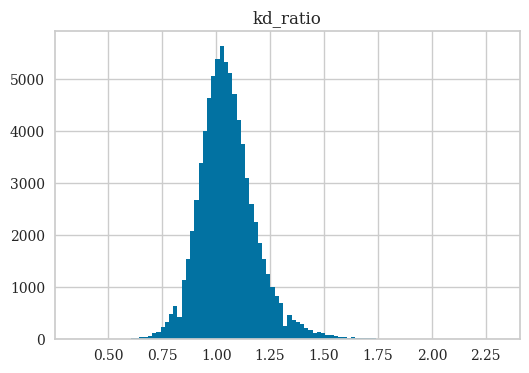

In [11]:
valorant_df.hist("kd_ratio", bins = 100, figsize=(6, 4))

Below is a table showing central tendency values of KDR across ratings. As can be seen, the means and medians of the KDR both increase from Immortal 1 to Radiant (as the rating increases). Inversely, standard deviation decreases as rating increases. These all indicate that KDR improves as the ranks go higher.

In [12]:
valorant_df.groupby('rating')['kd_ratio'].agg(["mean", "std", "median", "count"])

mean       std  median  count
rating                                       
Immortal 1  1.038789  0.140897    1.03  45757
Immortal 2  1.067307  0.130893    1.05  20285
Immortal 3  1.078660  0.121892    1.06  10837
Radiant     1.100929  0.118626    1.09   2584

Lastly, we can take a look at the boxplot for KDR grouped by rating. As can be seen, both the Q1, Q2, and Q3 of the IQR's across ratings increase from lower to higher ranks. Notice also that the 'height' of the IQR's decrease across the ratings, indicating that there is less variation among the KDR's of players as rating increases. Furthermore, there are seemingly much less outliers in KDR as the rating increases. 

<AxesSubplot: title={'center': 'kd_ratio'}, xlabel='rating'>

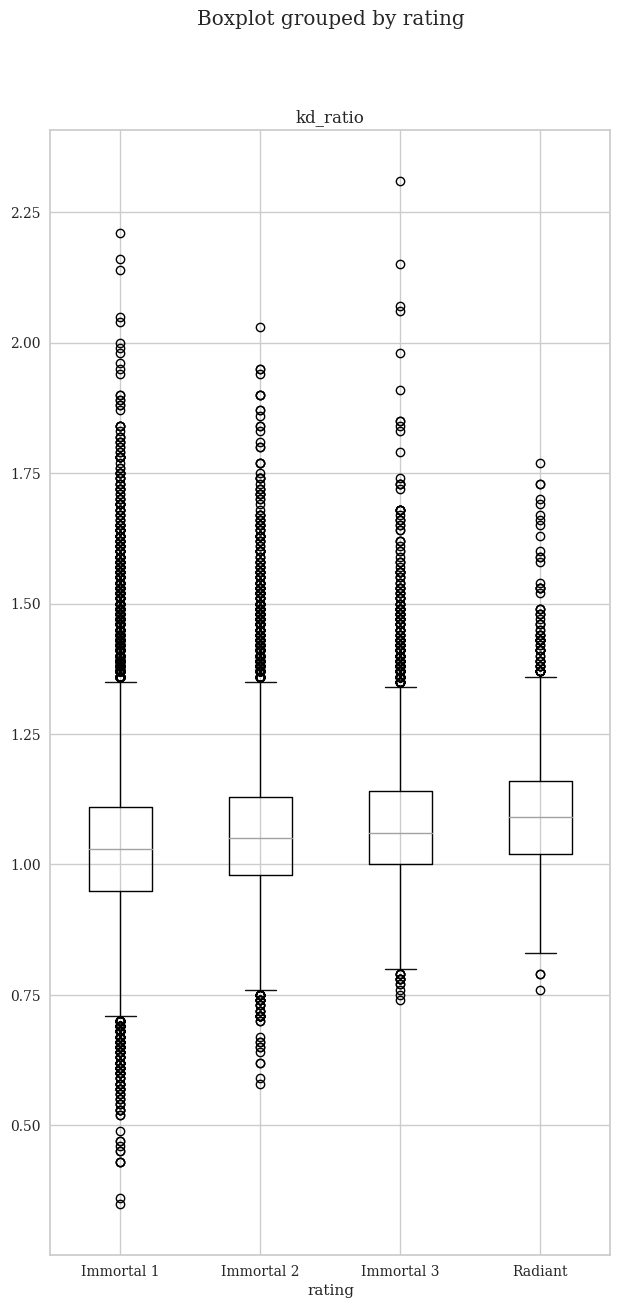

In [13]:
valorant_df.boxplot("kd_ratio", by="rating", figsize=(7,15))

Although it would seem that the *KDR of players improves as rating increases* based on what we have seen so far, statistical inference is still required to conclude whether this difference in KDR across ratings is significant or not as there are still many factors to consider, such as the count of radiant players being significantly less than other ranks and the presence of outliers. 

### EDA Question 2

There are different agents to play in Valorant. Each of them has different abilities and roles. Therefore, each agent would have unique gameplay. Some agents have abilities that would damage other players. Some would have utilities like smoke and flashes to get an advantage. To help us understand more information about the agents for the game, we want to know the following:

***Is there a major difference between the most used agent and the average damage done per round by the player?***

We start by checking the central tendencies of the damage per round grouped by the most used agent of the player.

In [14]:
agents_df = valorant_df.groupby('agent_1')['damage_round'].agg(["mean", "std", "median", "count"])
agents_df.sort_values('mean', ascending = False)

mean        std  median  count
agent_1                                        
Phoenix    152.466667  15.364139  151.80    114
Reyna      150.795677  15.038253  149.50  10339
Jett       149.034442  14.096256  147.90  11158
Raze       148.985499  14.531005  147.80   5579
Neon       148.246600  14.934656  147.45   1000
Yoru       145.914074  14.559315  144.55    540
Chamber    143.900865  13.370543  143.00  18382
KAY/O      139.239561  13.887563  138.50   1777
Skye       138.623496  13.979819  138.40   1579
Fade       138.263551  12.466496  137.70   5221
Sova       137.723643  13.516306  137.10   5397
Cypher     136.826582  13.858354  135.50    395
Astra      136.447330  13.784870  135.95    412
Killjoy    136.250640  14.274900  135.10    547
Breach     135.826901  14.260593  134.90    513
Sage       134.995946  14.493321  135.00   4637
Omen       134.927407  12.833261  134.30   5495
Viper      134.336383  13.106338  134.10   3246
Brimstone  134.213346  13.135816  133.60   3132

Due to the large number of agents available in the game, it is difficult to infer information from the table above. Simple extraction may be possible such as Phoenix dealing more average damage than Brimstone. Reasons behind this are unknown though. A simple hypothesis could be agents deal more damage because they have damaging abilities, however, this is easily countered by the given data above since Reyna, the second highest damage dealing agent, does not have any damaging abilities, while Brimstone's two abilities damage enemies.

In order to simplify the information and possibly extract hypotheses, the agents were categorized. In valorant, agents are categorized into 4 roles with the following in-game description [click here to know more](https://valorant.fandom.com/wiki/Agents):
- Controller: "Controllers are experts in slicing up dangerous territory to set their team up for success."
- Duelist: "Duelists are self-sufficient fraggers who their team expects, through abilities and skills, to get high frags and seek out engagements first."
- Initiator: "Initiators challenge angles by setting up their team to enter contested ground and push defenders away."
- Sentinel: "Sentinels are defensive experts who can lock down areas and watch flanks, both on attacker and defender rounds."

The damage dealt could be different depending on the roles played. Therefore, we categorize the agents by their roles:
- Controller: Brimstone, Viper, Omen, Astra
- Duelist: Phoenix, Jett, Reyna, Raze, Yoru, Neon
- Initiator: Sova, Breach, Skye, Fade, KAY/O
- Sentinel: Killjoy, Cypher, Sage, Chamber
Below, we see the central tendencies of the damage dealt categorized by their roles

In [15]:
controllers = ['Brimstone', 'Viper', 'Omen', 'Astra']
controllers_df = valorant_df[valorant_df['agent_1'].isin(controllers)]
controllers_df['damage_round'].agg(["mean", "std", "median", "count"])

mean        134.640171
std          13.022711
median      134.100000
count     12285.000000
Name: damage_round, dtype: float64

In [16]:
duelists = ['Phoenix', 'Jett', 'Reyna', 'Raze', 'Yoru', 'Neon']
duelists_df = valorant_df[valorant_df['agent_1'].isin(duelists)]
duelists_df['damage_round'].agg(["mean", "std", "median", "count"])

mean        149.586297
std          14.603697
median      148.300000
count     28730.000000
Name: damage_round, dtype: float64

In [17]:
initiators = ['Sova', 'Breach', 'Skye', 'Fade', 'KAY/O']
initiators_df = valorant_df[valorant_df['agent_1'].isin(initiators)]
initiators_df['damage_round'].agg(["mean", "std", "median", "count"])

mean        138.135080
std          13.289491
median      137.600000
count     14487.000000
Name: damage_round, dtype: float64

In [18]:
sentinels = ['Killjoy', 'Cypher', 'Sage', 'Chamber']
sentinels_df = valorant_df[valorant_df['agent_1'].isin(sentinels)]
sentinels_df['damage_round'].agg(["mean", "std", "median", "count"])

mean        141.886294
std          14.108137
median      141.300000
count     23961.000000
Name: damage_round, dtype: float64

With these data, some inferences can be made. Significant differences in the count can be seen. More players tend to use duelists and sentinels more than initiators and controllers. Moreover, there are differences in the mean damage dealt per round. The roles can be sorted in the following order: *Duelists > Sentinels > Initiators > Controllers*

To better visualize the data, we can construct a histogram for the roles. In the figure below, we can see the distribution of the average damage dealt per round according to the following legend:
- **Red: Controller**
- **Blue: Duelist**
- **Yellow: Initiator**
- **Green: Sentinel**

array([[<AxesSubplot: title={'center': 'damage_round'}>]], dtype=object)

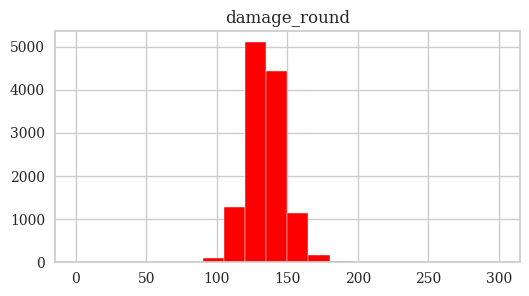

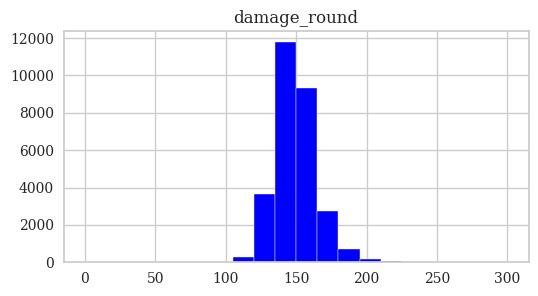

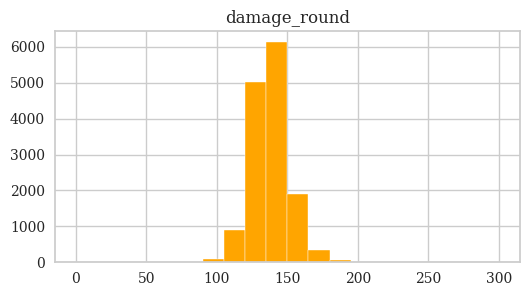

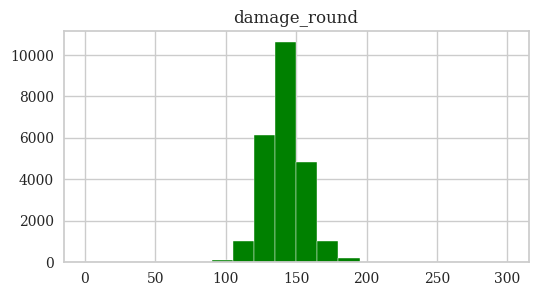

In [19]:
controllers_df.hist("damage_round", bins = 20, range = (0, 300), edgecolor ='w', figsize = (6,3), color = 'red')
duelists_df.hist("damage_round", bins = 20, range = (0, 300), edgecolor ='w', figsize = (6,3), color = 'blue')
initiators_df.hist("damage_round", bins = 20, range = (0, 300), edgecolor ='w', figsize = (6,3), color = 'orange')
sentinels_df.hist("damage_round", bins = 20, range = (0, 300), edgecolor ='w', figsize = (6,3), color = 'green')

From the figure above, we can see a more normal distribution in the roles of the Duelist (Blue) and Sentinel (Green). There is a more positively skewed distribution in for the role of Initiator (Orange) and Controller (Red). With this, we can extract the hypothesis that "*Duelists and Sentinels deal more damage than Initiators and Controllers*". 

This hypothesis is more believable due to the fact that it fits their roles, especially that Initiators and Controllers are more supportive roles. However, statistical testing and inference are still needed to confirm whether these differences are significant or not.

### EDA Question 3
There are different possible measures on the performance of each player. These may come in the form of the player's headshot percentage or their winrate. An assumption can be made where players with higher headshot percentage have also higher win percentage because they (players with higher headshot percentage) are able to hit more headshots, which means they get more kills. And eliminating the enemy team is one of the possible ways to win the game. Therefore, we ask the question

***Is there a correlation between the headshot percentage and win percentage of the players?***

First, we determine the correlation of the two variables. On the table below, we can see that there is almost no correlation between the headshot percentage and win percetage of the players.

In [20]:
hp_wp_df = valorant_df[['headshot_percent', 'win_percent' ]]
hp_wp_df.corr()

headshot_percent  win_percent
headshot_percent          1.000000     0.000818
win_percent               0.000818     1.000000

We can visualize the correlation by plotting the variables on a scatterplot. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Burger Truck\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Relationship of headshot percentage and win percentage of the players')

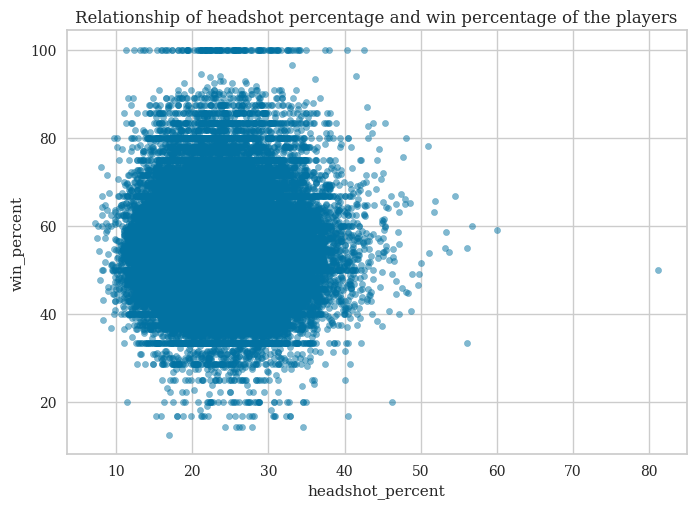

In [21]:
hp_wp_df.plot.scatter(x='headshot_percent', y='win_percent', alpha=0.5)
plt.title('Relationship of headshot percentage and win percentage of the players')

After plotting, we can see that the points on the scatterplot are seemingly scattered at the left portion of the plot (less headshot percentage) which supports the numerical inference that there is no correlation between the two variables. Therefore, the hypothesis is that *players who have a high headshot percentage **does not** necesarily win more games*.  

# Research Question

From the exploratory data analysis, we begin to see the different measures of a player's performance. With these data, we would like to see whether there are defining factors or ideas that affect a player's gameplay. With this, we would explore the question:

***Would prominent patterns surface among different players if we were to do clustering based on their performance?***

To better give an idea for the question, factors include the different variables in the dataset. May it be the where the region a player is playing, what agent they most often use, what gun they use the most, what rank they are in, etc. 

The performance of the player can be determined by metrics that show whether a player plays well. These may include numerical data such as average damage per round, average score per round, KDA ratio of the player, etc.

# Phase 2

## KMeans Clustering
In line with the research question, the following features for measuring the performance of a player were chosen to perform KMeans clustering:

- damage_round
- kd_ratio
- win_percent
- headshot_percent
- kills_round
- score_round
- first_bloods
- aces
- clutches
- flawless
- assists



### Data Preprocessing

Before performing KMeans clustering, data pre-processing was first done on some select variables including aces, first_bloods, clutches, and flawless. This is because these variables **do not represent the average performance of a player** like the other variables. This means that a player could simply have a very high number of first bloods just because he/she has played more games. Because of this, the value per game was calculated for these variables and added as additional columns to the dataframe as seen below. 



In [22]:
valorant_df['clutches_game'] = [ y/(w/(x/100)) for (w,x,y) in valorant_df[['wins', 'win_percent', 'clutches']].itertuples(index = False)]
valorant_df['aces_game'] =     [ y/(w/(x/100)) for (w,x,y) in valorant_df[['wins', 'win_percent', 'aces']].itertuples(index = False)]
valorant_df['flawless_game'] = [ y/(w/(x/100)) for (w,x,y) in valorant_df[['wins', 'win_percent', 'flawless']].itertuples(index = False)]
valorant_df['firstbloods_game'] = [ y/(w/(x/100)) for (w,x,y) in valorant_df[['wins', 'win_percent', 'first_bloods']].itertuples(index = False)]
valorant_df['assists_game'] = [ y/(w/(x/100)) for (w,x,y) in valorant_df[['wins', 'win_percent', 'assists']].itertuples(index = False)]

performanceValues = ['damage_round', 'kd_ratio', 'win_percent', 'headshot_percent', "kills_round", "score_round", "clutches_game", "aces_game", "flawless_game", "firstbloods_game", "assists_game"]
valorant_df[['clutches_game', 'aces_game', 'flawless_game','firstbloods_game','assists_game']].head()

clutches_game  aces_game  flawless_game  firstbloods_game  assists_game
0       1.414237   0.000000       0.808136          1.626373      7.101492
1       1.543769   0.025308       1.189462          3.998615      2.606692
2       1.827429   0.046857       0.921524          3.373714      4.170286
3       1.628875   0.058875       0.961625          4.611875      3.081125
4       1.393375   0.039250       0.745750          2.688625      4.180125

#### Min Max Scaling
Additionally, because these variables mean very different things and vary greatly in their ranges as some are ratios, some are raw values, it is important to scale them first to ensure that each variable is equally accounted for during clustering. Because of this, min-max-scaling was first performed on the chosen performance features.



In [23]:
scaler = MinMaxScaler()
X = pd.DataFrame.to_numpy(valorant_df[performanceValues])
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = performanceValues)
X_scaled.head()


damage_round  kd_ratio  win_percent  headshot_percent  kills_round  \
0      0.362396  0.367347     0.538286          0.239189     0.363636   
1      0.530443  0.510204     0.609143          0.285135     0.636364   
2      0.419386  0.357143     0.606857          0.227027     0.454545   
3      0.568924  0.535714     0.574857          0.406757     0.636364   
4      0.430589  0.387755     0.574857          0.232432     0.454545   

   score_round  clutches_game  aces_game  flawless_game  firstbloods_game  \
0     0.374724       0.372168   0.000000       0.248657          0.209251   
1     0.569984       0.406255   0.042179       0.365988          0.536858   
2     0.434755       0.480902   0.078095       0.283546          0.450559   
3     0.590205       0.428651   0.098125       0.295885          0.621550   
4     0.444550       0.366678   0.065417       0.229462          0.355948   

   assists_game  
0      0.491791  
1      0.117224  
2      0.247524  
3      0.156760  
4      0.248344

#### Extracting Roles
Lastly, the primary roles of each player were also extracted from his/her primary agent (*agent_1*) so that their prominence can be observed after clustering. The roles of each agent can be seen below:

- Controller: Brimstone, Viper, Omen, Astra
- Duelist: Phoenix, Jett, Reyna, Raze, Yoru, Neon
- Initiator: Sova, Breach, Skye, Fade, KAY/O
- Sentinel: Killjoy, Cypher, Sage, Chamber

In [24]:
valorant_df['role'] = ['Duelist' if agent in duelists else 'Sentinel' if agent in sentinels else 'Controller' if agent in controllers else 'Initiator' if agent in initiators else 'Unknown' for agent in valorant_df['agent_1']]
valorant_df.head()

region           name     tag   rating  damage_round  headshots  \
0     NA       ShimmyXD    #NA1  Radiant         135.8        992   
1     NA      XSET Cryo  #cells  Radiant         170.3        879   
2     NA  PuRelittleone  #yoruW  Radiant         147.5        720   
3     NA           Boba   #0068  Radiant         178.2        856   
4     NA    i love mina  #kelly  Radiant         149.8        534   

   headshot_percent  aces  clutches  flawless  ...  gun3_head  gun3_body  \
0              24.9     0       140        80  ...         36         60   
1              28.3     2       122        94  ...         32         63   
2              24.0     3       117        59  ...          8         91   
3              37.3     3        83        49  ...         44         56   
4              24.4     2        71        38  ...          8         92   

   gun3_legs  gun3_kills  clutches_game  aces_game  flawless_game  \
0          3         147       1.414237   0.000000       0.808136   
1          5         137       1.543769   0.025308       1.189462   
2          1         102       1.827429   0.046857       0.921524   
3          0          36       1.628875   0.058875       0.961625   
4          0          64       1.393375   0.039250       0.745750   

   firstbloods_game  assists_game       role  
0          1.626373      7.101492  Initiator  
1          3.998615      2.606692   Sentinel  
2          3.373714      4.170286    Duelist  
3          4.611875      3.081125    Duelist  
4          2.688625      4.180125    Duelist  

[5 rows x 44 columns]

### Elbow Method
#### Distortion Score
To get an idea of the best number of clusters to use for KMeans clustering, the elbow method was first performed. For this, the distortion values were calculated from clusters 1 to 9. The resulting graph can be seen below:

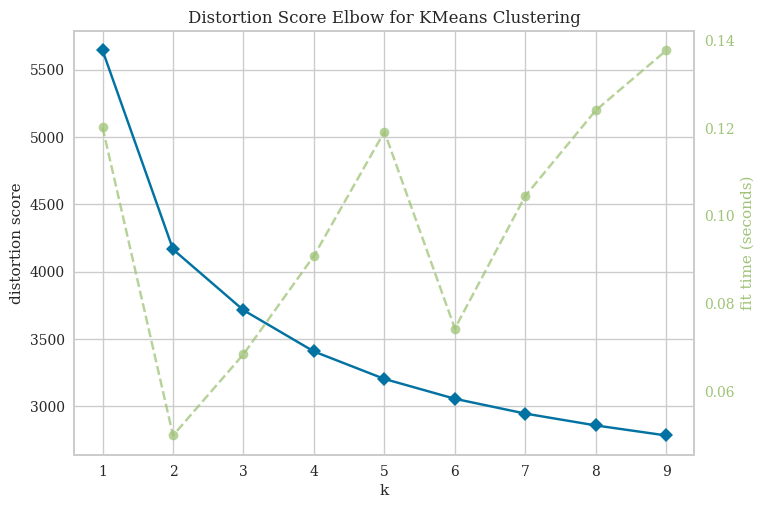

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
km = KMeans(random_state = 0, n_init = 'auto')
visualizer = KElbowVisualizer(km, k= (1,10),  locate_elbow=False)
visualizer.fit(X_scaled)
visualizer.show()

Based from the graph, there would seem to be an elbow at k=2 or k=3, with the elbow point being slightly clearer at k = 2. However, it is important to note that the shape of the elbow is not conclusively defined, and a smooth curve can still be observed in the graph. As such, more tests are needed to conclude what the best number of clusters is. 

#### Calinski Harabasz Score
In line with this, the group decided to try using the Calinski Harabasz metric as well. For this, the Calinski Harabasz score was calculated for clusters 2 to 10. The reason for this is because Calinski Harabasz Score also takes into account the distance between each cluster. The resulting graph can be seen below:

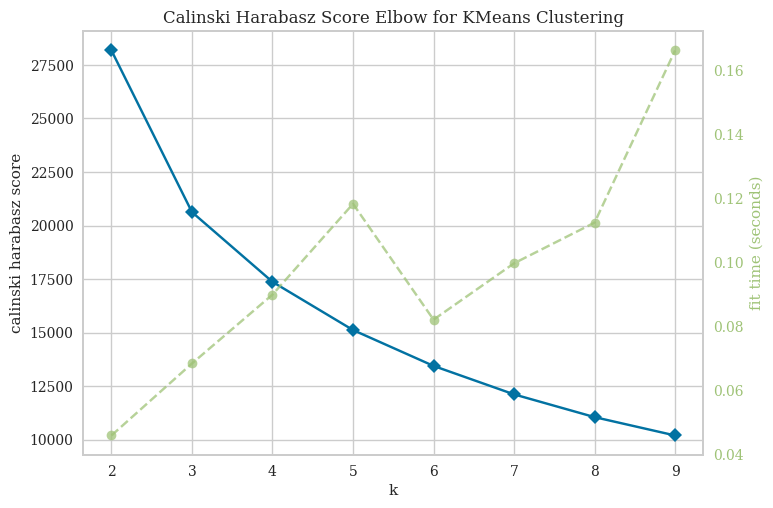

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
visualizer = KElbowVisualizer(km,metric='calinski_harabasz', k= (2,10), locate_elbow = False)
visualizer.fit(X_scaled)
visualizer.show()

As can be seen above, a peak in the Calinski Harabasz score can be seen at k = 2, which indicates that the clusters are more dense and well-separated at k = 2.  This result is also congruent with the result of from the distortion score. Because of this, the group decided that it would be best if there are 2 clusters. 

### Clustering using KMeans Algorithm

In [27]:
valorant_df['role'] = ['Duelist' if agent in duelists else 'Sentinel' if agent in sentinels else 'Controller' if agent in controllers else 'Initiator' if agent in initiators else 'Unknown' for agent in valorant_df['agent_1']]
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X_scaled)
print (y_km)
valorant_df['clusters'] = y_km


C:\Users\Burger Truck\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 ... 1 0 1]


### Exploratory Data Analysis of the Clusters
***What are the main differences of cluster 0 and cluster 1?***
#### Polar Plot
After clustering the dataset, a polar plot of all performance features by each cluster was created to better visualize the performance values in both clusters. 

In [28]:
cols = performanceValues + ['clusters']
cols
X_scaled['clusters'] = y_km
polar =X_scaled[cols].groupby("clusters").mean().reset_index()

polar = pd.melt(polar,id_vars=["clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="clusters", line_close=True, height=500, width=750)
fig.show()

C:\Users\Burger Truck\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
C:\Users\Burger Truck\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


As can be seen in the figure above, the performance values of cluster 1 across all features are greater than or almost equal to those in cluster 0 except for assists per game. Although most values of cluster 1 are higher, interestingly, there are some features where the difference is much more obvious. This includes damage per round, kd ratio, first bloods per game, score per round, aces per game, and kills per round.

Some variables have smaller differences such as flawless per game and clutches per game. For flawless per game, this result is somewhat expected as flawless means winning a round without any members of your team dying. Hence, not much difference is expected across different roles.

## Hypothesis Testing 1: Cluster Differences


### Hypothesis Testing #1A
#### T-Test of performance features across clusters
To confirm the results of the polar plot above, t tests were first performed on the means of each performance feature other than assists per game across the 2 clusters. We want to test whether it is statistically significant that the performance values of cluster 1 other than assists_game are greater than cluster 0. The following are the null and alternative hypotheses. 

To ensure that there is a significant different between the two clusters (e.g. Cluster 1 really performs better than Cluster 0 players), a hypothesis testing is needed. From the EDA above, in most variables, aside from assists per game, Cluster 1 seems to have greater values than Cluster 0. This is used for the null and alternate hypotheses.

**Type of Test**: One Tailed T-Test with Significance Level: 99%
**H<sub>0</sub>**: The average performance values other than assists_game of cluster 1 are less than or equal to the performance values of cluster 0
**H<sub>a</sub>**: The average performance values of cluster 1 other than assists_game are greater than the performance values of cluster 0


In [29]:
for feature in (performanceValues):
    if feature=='assists_game':
        continue
    statistic, pvalue = ttest_ind(valorant_df[valorant_df["clusters"] == 0][feature],
            valorant_df[valorant_df["clusters"] == 1][feature],
            equal_var = False, alternative = "less")
    if pvalue < 0.01:
        conclusion = "Significant"
    else:
        conclusion = "NOT Significant"
    if pvalue > 0.0001:
        string_p = "= " + str(pvalue.round(4))
    else:
        string_p = "< 0.0001"
    print(feature+": Statistic = "+ str(statistic.round(2)) + ", PValue " + string_p + " - " + conclusion)



damage_round: Statistic = -269.58, PValue < 0.0001 - Significant
kd_ratio: Statistic = -195.01, PValue < 0.0001 - Significant
win_percent: Statistic = -39.11, PValue < 0.0001 - Significant
headshot_percent: Statistic = -78.23, PValue < 0.0001 - Significant
kills_round: Statistic = -280.59, PValue < 0.0001 - Significant
score_round: Statistic = -280.35, PValue < 0.0001 - Significant
clutches_game: Statistic = -24.38, PValue < 0.0001 - Significant
aces_game: Statistic = -80.76, PValue < 0.0001 - Significant
flawless_game: Statistic = -14.97, PValue < 0.0001 - Significant
firstbloods_game: Statistic = -242.69, PValue < 0.0001 - Significant


From the results above, it can be seen that the pvalues for all provided performance features are extremely small. This implies that it is almost impossible for the current data to occur assuming the null hypothesis is true. Thus, with a 99% confidence level, we can reject the null hypothesis and conclude that the performance values of cluster 1 other than assists_game are greater than the performance values of cluster 0, supporting the results of the polar plot. 


### Hypothesis Testing #1B

##### T-test of assists per game
Next, we test whether the assists per game of cluster 1 is statistically significantly lower than that of cluster 2. The following are the null and alternative hypothesis:

**Type of Test**: One Tailed T-Test with Significance Level: 99%
**H<sub>0</sub>**: The average number of assists per game of cluster 1 greater than or equal to the assists per game of cluster 0
**H<sub>a</sub>**: The average number of assists per game of cluster 1 is less than the assists per game of cluster 0


In [30]:
statistic, pvalue = ttest_ind(valorant_df[valorant_df["clusters"] == 0]["assists_game"],
        valorant_df[valorant_df["clusters"] == 1]["assists_game"],
        equal_var = False, alternative = "greater")
if pvalue < 0.01:
    conclusion = "Significant"
else:
    conclusion = "NOT Significant"
if pvalue > 0.0001:
    string_p = "= " + str(pvalue.round(4))
else:
    string_p = "< 0.0001"
print("assists_game: Statistic = "+ str(statistic.round(2)) + ", PValue " + string_p + " - " + conclusion)

assists_game: Statistic = 172.26, PValue < 0.0001 - Significant


As can be seen, the resulting pvalue is also extremely small, and so we can accept the alternative hypothesis that the average number of assists per game of cluster 1 is less than the assists per game of cluster 0. From this we can conclude that the differences in the performance values of both clusters are statistically significant. Cluster 0 has lower performance values than cluster 1, but the former has higher assists per game, which can indicate that cluster 0 is composed more of supportive players with lower performance values, while cluster 1 is composed more of agressive players with higher performance values. 

## Distribution of Roles by Cluster
Since the main difference between cluster 0 and 1 could be that one cluster is more supportive than the other, it then begs the question if the roles have a factor into these clusters. As some roles and agents are more supportive then others. For instance, "support" oriented agents may have lower performance rating over "combat" oriented agents because their abilities are not made for gunfights and aggressiveness, and thus might be put in cluster 0. Therefore, the percent distribution of each role was then calculated across the 2 clusters. Below is a table containing the percentages of each row accross the 2 clusters. 

In [31]:
def clusterCategories(dataframe, categories, features):
    ret = pd.DataFrame()
    row = {};
    for i in dataframe['clusters'].unique():
        row['Cluster'] = i
        for category in categories:
            temp = {value: round(dataframe[(dataframe['clusters']==i) & (dataframe[category]==value)].shape[0] / dataframe[(dataframe[category]==value)].shape[0]*100,2) for value in dataframe[category].unique()}
            row = row | temp
        for v in features:
            row[v] = dataframe[dataframe['clusters']==i][v].mean() 
        
        # print(row) 
        ret = ret.append(row, ignore_index = True) 
        # print(ret)         
    ret = ret.convert_dtypes()   
    ret= ret.set_index('Cluster')

    return ret      

In [32]:
categories = ['role']
df = clusterCategories(valorant_df, categories, performanceValues)
display(df)
# df

print("")

C:\Users\Burger Truck\AppData\Local\Temp\ipykernel_7132\3386803691.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Burger Truck\AppData\Local\Temp\ipykernel_7132\3386803691.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initiator  Sentinel  Duelist  Controller  damage_round  kd_ratio  \
Cluster                                                                     
0            79.65     52.37    30.65       84.28    133.256213  0.981323   
1            20.35     47.63    69.35       15.72    154.342248  1.139754   

         win_percent  headshot_percent  kills_round  score_round  \
Cluster                                                            
0          52.652488         22.326984     0.700488   202.638487   
1          55.180138           25.0507     0.827809   237.046575   

         clutches_game  aces_game  flawless_game  firstbloods_game  \
Cluster                                                              
0             1.455354   0.014795       0.864663          1.759695   
1             1.501464   0.033942        0.88792          2.740248   

         assists_game  
Cluster                
0            5.769808  
1            4.516283

As can be seen from the table, a large percentage of controllers and initiators can be found in cluster 0, while majority of duelists belong to cluster 1. It can also be noted that sentiles seem to have an even distribution among the two clusters, this idea will be explored later in the notebook. Additionally, it can be observed that each performance feature in cluster 1 is higher than that of cluster 0, except for assists per game, similar with the polar plot. It is important to also note that cluster 0 has a much higher assists per game, which infers that roles like controller and initiators are more supportive and duelists are more aggressive.  

From this, we can hypothesize that the dataset was not clustered only by general performance levels, but also by role/playstyle, specifically supportive or agressive. 

### EDA for the Distribution of Roles Among Clusters
To get a better idea of whether the distribution of roles in each cluster is accurate or not, explorative data analysis was also performed to visualize differences of roles between clusters. 

#### Boxplot of duelists by cluster
Based on the previous results, it would seem that our hypothesis that cluster 0 contains supportive players while cluster 1 contains more agressive players is likely to be true. However, to further validate this, a boxplot of each performance feature by the duelists of each cluster was also created. This was done to see whether the same behavior of cluster 0 being more supportive can be observed amongst its duelists as well. 

Note: The boxplots show the scaled value of each performance feature

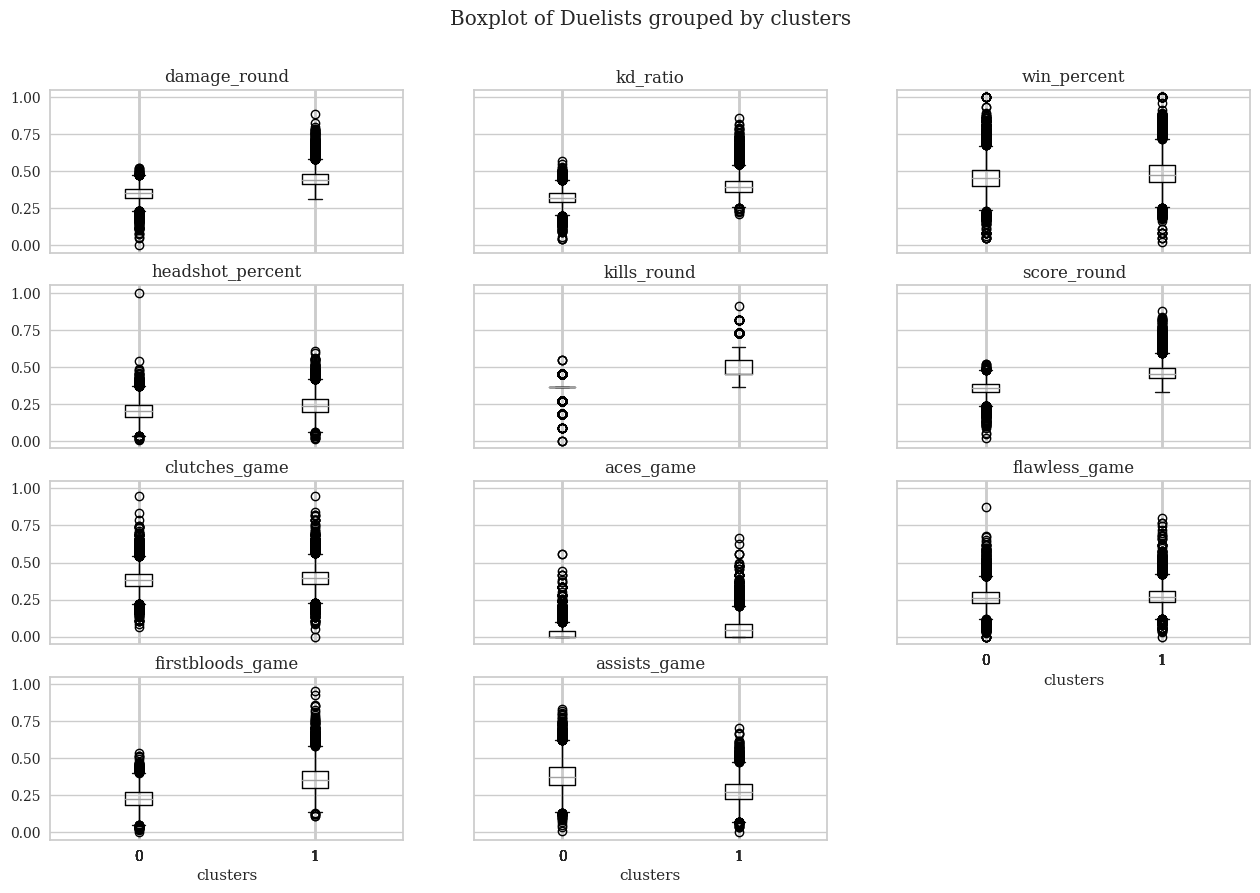

In [33]:
X_scaled['role'] = valorant_df['role']
X_scaled[X_scaled['role']=='Duelist'].boxplot(performanceValues, by="clusters", figsize=(15,10))
plt.suptitle('Boxplot of Duelists grouped by clusters')
plt.show()

As can be seen, the same pattern can be observed in the boxplot and in the results of the polar plot. The duelists of cluster 0 have lower values for all performance features except for assists per game. This could indicate that the duelists in cluster 0 have a more supportive playstyle than their counterparts in cluster 1. This could also indicate that perhaps some duelist agents have more supportive abilities, and thus were clustered into cluster 0. 


#### Boxplot of other roles by cluster
To ensure that the same pattern is also observed in different roles, boxplots for controllers, initiators, and sentinels were also created below.

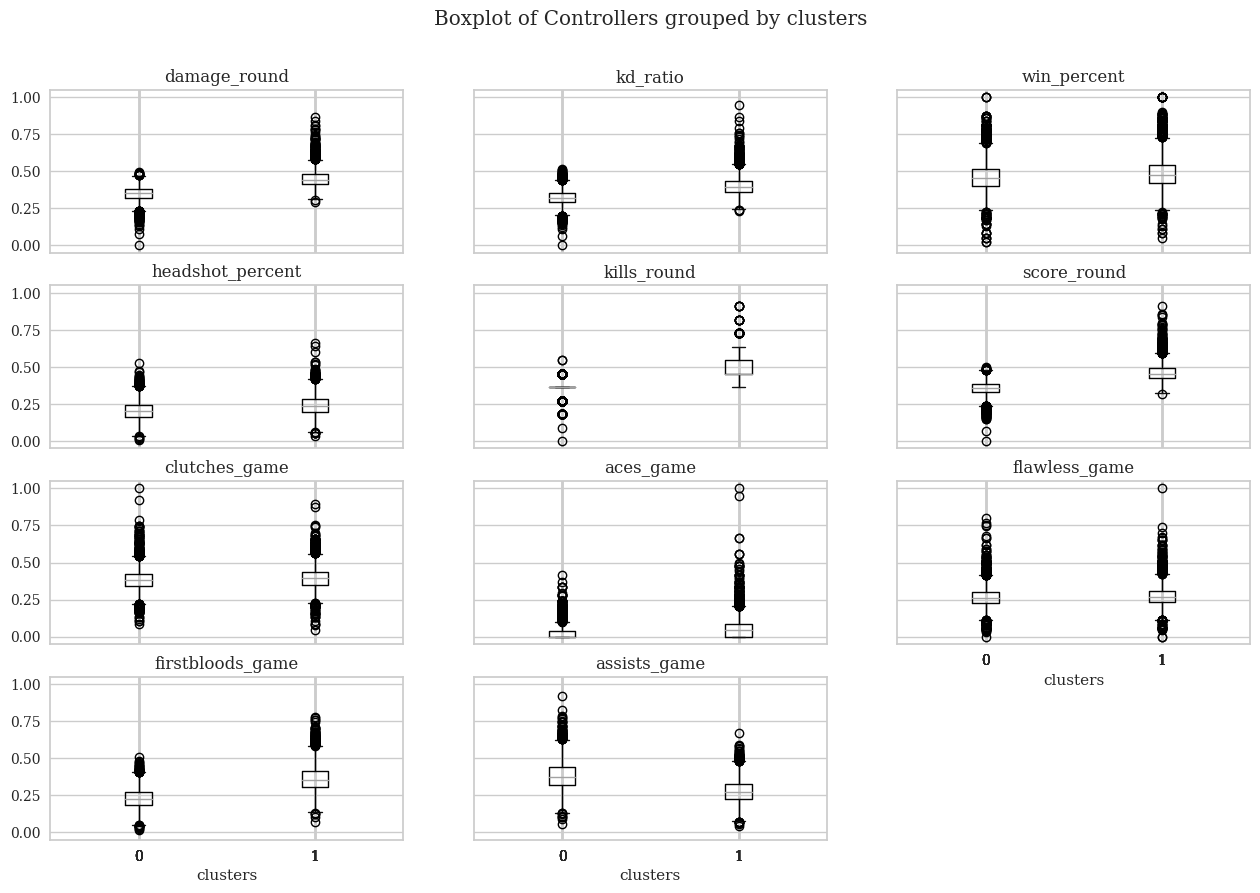

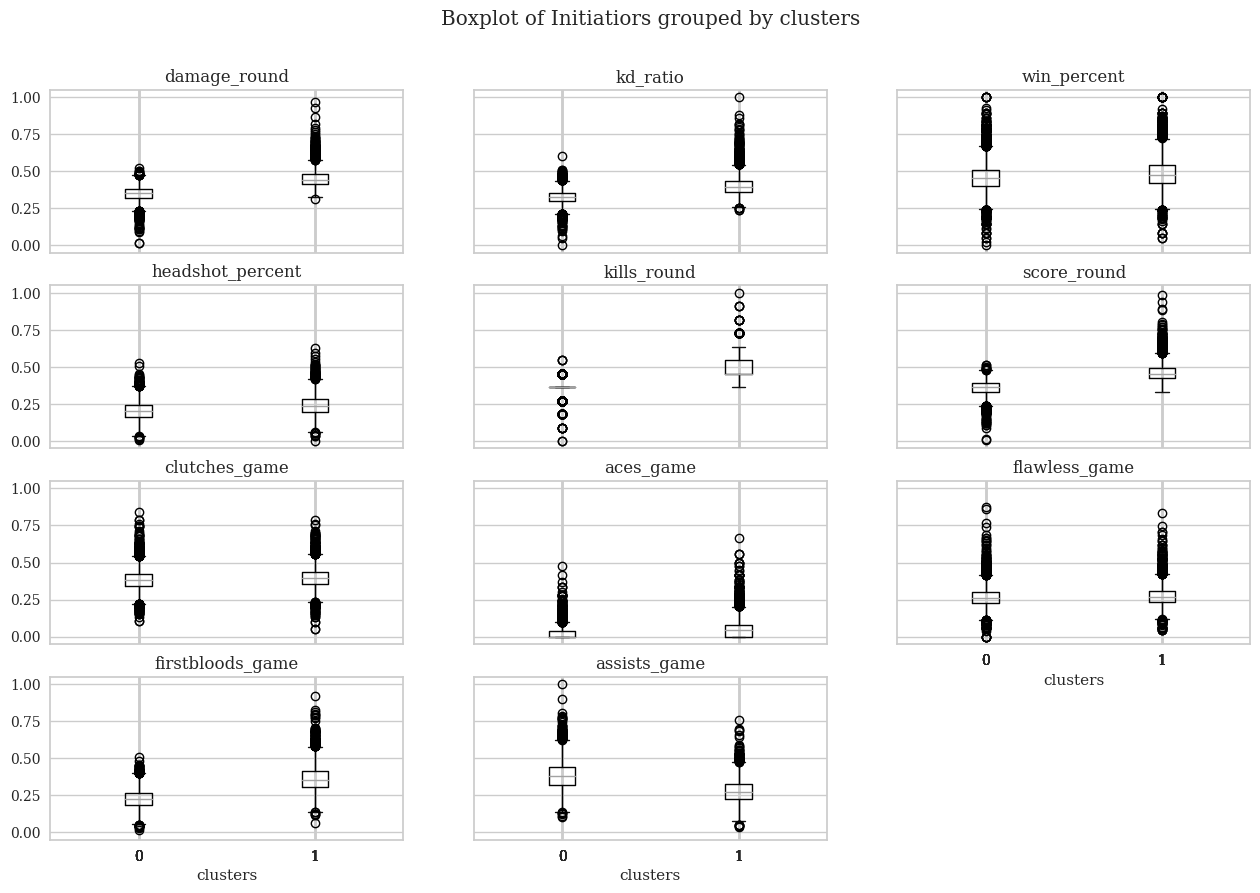

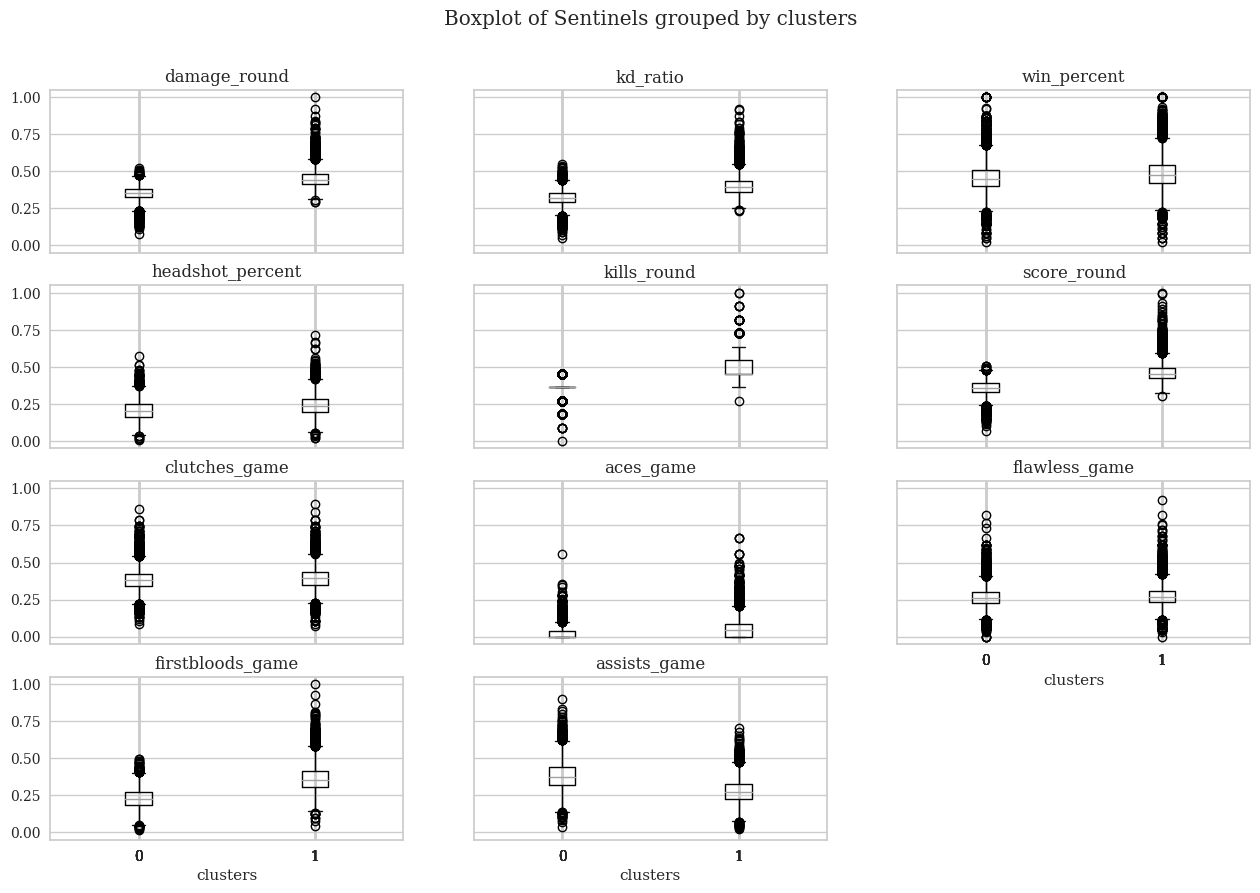

In [34]:
X_scaled[X_scaled['role']=='Controller'].boxplot(performanceValues, by="clusters", figsize=(15,10))
plt.suptitle('Boxplot of Controllers grouped by clusters')
plt.show()
X_scaled[X_scaled['role']=='Initiator'].boxplot(performanceValues, by="clusters", figsize=(15,10))
plt.suptitle('Boxplot of Initiatiors grouped by clusters')
plt.show()
X_scaled[X_scaled['role']=='Sentinel'].boxplot(performanceValues, by="clusters", figsize=(15,10))
plt.suptitle('Boxplot of Sentinels grouped by clusters')
plt.show()


Based from the boxplots above, it can be observed that the same pattern can be observed in the peformance values of each cluster across all roles. 

## Hypothesis Testing 2: The Case of Sentinels

From the percentage of sentinels in cluster 0 and 1, there may seem to have no specifics on which cluster they belong to, supportive or aggresive. As this is the only role with such case, this section explores the different possible implications of the case.

In [35]:
print((valorant_df[(valorant_df['role'] == 'Sentinel')].value_counts('agent_1', normalize = True) * 100).round(2))

agent_1
Chamber    76.72
Sage       19.35
Killjoy     2.28
Cypher      1.65
dtype: float64


There could be several hypotheses as to why there are similar amounts of sentinels in cluster 0 and in cluster 1. The following are some possibilities:
- There could be sentinel agents that are more aggressive and there could be agents that are more supportive.
- There are no specific role or cluster that sentinel belongs to, they all depend on different players' playstyle and are independent on the role.

However, upon examining the distribution of agents in Sentinels, there are significant observations. Chamber is largely more used than other agents. In fact, majority, 76%, of sentinel players are Chamber players.

Chamber is an agent released more recently compared to the other sentinels. Upon release, he quickly gained attention and high pick rate in almost all games. This section explores Chamber and some of his characteristics.

### Hypothesis Testing #2A

#### Chamber between Clusters 0 and 1
This part tries to determine whether the high pickrate of Chamber affects the distribution of Sentinels in Cluster 0 and 1. It could be hypothesized that Chamber's playstyle is more aggressive than supportive.
To test the aforementioned observation, we decided to compare the 2 proportions.

**Type of Test**: One-Tailed Z-Test for Proportion with Significance Level: 99% 
**H<sub>0</sub>**: The proportion of Chamber players on cluster 1 is less than or equal to the proportion on cluster 0
**H<sub>a</sub>**: The proportion of Chamber players on cluster 1 is greater than the proportion on cluster 0

#### Implications
- H<sub>0</sub> would mean that the high percentage of Chamber players of the two clusters is due to the latent high pick rate of the agent itself.
- H<sub>a</sub> would infer that that Chamber, as a sentinel, is more of an aggressive agent.

In [36]:
sen_cl0_df = valorant_df[(valorant_df['role'] == 'Sentinel') & (valorant_df['clusters'] == 0)]
sen_cl1_df = valorant_df[(valorant_df['role'] == 'Sentinel') & (valorant_df['clusters'] == 1)]
#cluster 0
print("Cluster 0 Percentage of Agents")
print((sen_cl0_df['agent_1'].value_counts(normalize=True) * 100).round(2))
#cluster 1
print("\n\nCluster 1 Percentage of Agents")
print((sen_cl1_df['agent_1'].value_counts(normalize=True) * 100).round(2))

# sentinels_df = valorant_df[(valorant_df['role'] == 'Sentinel')]
# print((sentinels_df.value_counts(['agent_1', 'clusters'], normalize=True) * 100).round(2))

Cluster 0 Percentage of Agents
Chamber    64.44
Sage       29.87
Killjoy     3.42
Cypher      2.27
Name: agent_1, dtype: float64


Cluster 1 Percentage of Agents
Chamber    90.21
Sage        7.79
Killjoy     1.03
Cypher      0.96
Name: agent_1, dtype: float64


The percentages above shows that in Cluster 1, 90 percent of the Sentinel players are using Chamber. This supported the hypothesis that Chamber, although is a Sentinel, has playstyle different to the normal Sentinel playstyle.

In [37]:
#total % of chamber
sen_ch = valorant_df[(valorant_df['agent_1'] == 'Chamber')].shape[0] / valorant_df[(valorant_df['role'] == 'Sentinel')].shape[0]
print(sen_ch)

#cluster 0 
cl0_ch = valorant_df[(valorant_df['agent_1'] == 'Chamber') & (valorant_df['clusters'] == 0)].shape[0] /  valorant_df[(valorant_df['role'] == 'Sentinel') & (valorant_df['clusters'] == 0)].shape[0]
#cluster 1
cl1_ch = valorant_df[(valorant_df['agent_1'] == 'Chamber') & (valorant_df['clusters'] == 1)].shape[0] /  valorant_df[(valorant_df['role'] == 'Sentinel') & (valorant_df['clusters'] == 1)].shape[0]

#no. of players cluster 0
cl0 =  valorant_df[(valorant_df['clusters'] == 0)].shape[0]
#no. of players cluster 1
cl1 =  valorant_df[(valorant_df['clusters'] == 1)].shape[0]

0.7671633070406076


In [38]:
z = (cl1_ch - cl0_ch)/ math.sqrt(sen_ch * (1-sen_ch) * (1/cl1 + 1/cl0))
z

85.59871697986026

In [39]:
print(sp.stats.norm.sf(z))

0.0


As we can see from the code block above, the p-value is extremely small because the z-value is big. Therefore, we accept the alternative hypothesis. Here, we conclude that the playstyle of Chamber affects how sentinels were distributed in the clusters. However, to fully conclude if Chamber's playstyle is really different from a sentinel, another hypothesis testing should be done.

### Hypothesis Testing #2B

#### Performance of Chamber Players vs Performance of Sentinel Players
To conclude if Chamber is really aggressive unlike a sentinel, hypothesis testing was also performed between the performance of Chamber players and the performance of sentinel players. With the idea that Chamber made up most of Cluster 1, which is significantly greater than Cluster 0's proportion, the following are the null and alternative hypothesis:

**Type of Test**: One-Tailed Z-Test for Proportion with Significance Level: 99% 
**H<sub>0</sub>**: The performance values of Chamber players are less than or equal to that of Sentinel players 
**H<sub>a</sub>**: The performance values of Chamber players are greater than that of Sentinel players

In [40]:
print("Chamber Players vs Sentinel Players")
for feature in (performanceValues):
    statistic, pvalue = ttest_ind(valorant_df[valorant_df["agent_1"] == 'Chamber'][feature],
            valorant_df[valorant_df["role"] == 'Sentinel'][feature],
            equal_var = False, alternative = "greater")
    if pvalue < 0.01:
        conclusion = "Significant"
    else:
        conclusion = "NOT Significant"
    if pvalue > 0.0001:
        string_p = "= " + str(pvalue.round(4))
    else:
        string_p = "< 0.0001"
    print(feature+": Statistic = "+ str(statistic.round(2)) + ", PValue " + string_p + " - " + conclusion)

Chamber Players vs Sentinel Players
damage_round: Statistic = 15.0, PValue < 0.0001 - Significant
kd_ratio: Statistic = 13.54, PValue < 0.0001 - Significant
win_percent: Statistic = -2.66, PValue = 0.9961 - NOT Significant
headshot_percent: Statistic = 3.96, PValue < 0.0001 - Significant
kills_round: Statistic = 16.24, PValue < 0.0001 - Significant
score_round: Statistic = 15.39, PValue < 0.0001 - Significant
clutches_game: Statistic = -0.4, PValue = 0.6554 - NOT Significant
aces_game: Statistic = 2.75, PValue = 0.003 - Significant
flawless_game: Statistic = 1.1, PValue = 0.1358 - NOT Significant
firstbloods_game: Statistic = 20.93, PValue < 0.0001 - Significant
assists_game: Statistic = -28.77, PValue = 1.0 - NOT Significant


From the results above, it can be observed that the p-values of the assists per game, flawless per game, clutches per game and win percent are greater than 0.01. Therefore, we fail to reject the null hypothesis. This means that for the aforementioned variables, these performance values are less than or equal to that of Sentinel players. On the other hand, damage per round, kd ratio, headshot percent, kills per round, score per round, aces per game and first bloods per game have p-values less than 0.01. Therefore, for these performance values, we accept the alternative hypothesis. This means that for these performance values, they are greater than that of Sentinel players. 

The result from Hypothesis Testing 2B did match with our hypothesis inferred from the Hypothesis Testing 2A. The result shows that Chamber may not be really classified under the Sentinel category. This could also explain why the Sentinels are almost even on both clusters.

## Hypothesis Testing 3: The Right Clusters for Other Roles

### Hypothesis Testing #3A

#### Duelists performance vs. Controllers and Initiators
To test whether it is appropriate that more duelists were grouped to cluster 1 while more controllers  and initiators were grouped to cluster 0, hypothesis testing was also performed between the performance values between these roles. For this, t-tests were performed between the performance values of duelists vs controllers and initiators. The following are the null and alternative hypotheses: 

**Type of Test**: One-Tailed t-test with Significance Level: 99%
**H<sub>0</sub>**: The performance values, not including assists_game, of duelists are less than or equal to that of controllers and initiators 
**H<sub>a</sub>**: The performance values, not including assists_game, of duelists are greater than that of controllers and initiators


In [41]:
print("Initiators")
for feature in (performanceValues):
    if feature=='assists_game':
        continue
    statistic, pvalue = ttest_ind(valorant_df[valorant_df["role"] == 'Duelist'][feature],
            valorant_df[valorant_df["role"] == 'Initiator'][feature],
            equal_var = False, alternative = "greater")
    if pvalue < 0.01:
        conclusion = "Significant"
    else:
        conclusion = "NOT Significant"
    if pvalue > 0.0001:
        string_p = "= " + str(pvalue.round(4))
    else:
        string_p = "< 0.0001"
    print(feature+": Statistic = "+ str(statistic.round(2)) + ", PValue " + string_p + " - " + conclusion)
print("\nControllers")
for feature in (performanceValues):
    if feature=='assists_game':
        continue
    statistic, pvalue = ttest_ind(valorant_df[valorant_df["role"] == 'Duelist'][feature],
            valorant_df[valorant_df["role"] == 'Controller'][feature],
            equal_var = False, alternative = "greater")
    if pvalue < 0.01:
        conclusion = "Significant"
    else:
        conclusion = "NOT Significant"
    if pvalue > 0.0001:
        string_p = "= " + str(pvalue.round(4))
    else:
        string_p = "< 0.0001"
    print(feature+": Statistic = "+ str(statistic.round(2)) + ", PValue " + string_p + " - " + conclusion)


Initiators
damage_round: Statistic = 81.76, PValue < 0.0001 - Significant
kd_ratio: Statistic = 40.42, PValue < 0.0001 - Significant
win_percent: Statistic = 0.52, PValue = 0.3022 - NOT Significant
headshot_percent: Statistic = 5.77, PValue < 0.0001 - Significant
kills_round: Statistic = 75.59, PValue < 0.0001 - Significant
score_round: Statistic = 83.78, PValue < 0.0001 - Significant
clutches_game: Statistic = 26.59, PValue < 0.0001 - Significant
aces_game: Statistic = 35.44, PValue < 0.0001 - Significant
flawless_game: Statistic = -2.77, PValue = 0.9972 - NOT Significant
firstbloods_game: Statistic = 133.61, PValue < 0.0001 - Significant

Controllers
damage_round: Statistic = 102.58, PValue < 0.0001 - Significant
kd_ratio: Statistic = 46.44, PValue < 0.0001 - Significant
win_percent: Statistic = -4.02, PValue = 1.0 - NOT Significant
headshot_percent: Statistic = 16.92, PValue < 0.0001 - Significant
kills_round: Statistic = 88.44, PValue < 0.0001 - Significant
score_round: Statistic =

From the results above, it can be observed that most performance features have an extremely small p-value that we can accept the alternative hypothesis for these features at a 99% confidence level. This supports how the prominence of duelists in cluster 1 and the prominence of controllers and initiators in cluster 0. However, the same cannot be said for the features flawless_game and win_percent, which have very high p-values. This contradicts how cluster 1 had higher values for flawless_game and win_percent. However, as mentioned before, it was expected that the role of a player would not affect flawless per game. The same can also be said for win percent. Because of Valorant's nature as a team game, all players in a team should be fulfilling their roles and performing well for the team to succeed. This supports the distribution of duelists, controllers, and intiiators in both clusters.

### Hypothesis Testing #3B

#### Duelists Assists vs Controllers and Initiators 
The same test was then performed on the assists of duelists vs controllers and initiators. The following are the null and alternative hypotheses:

**Type of Test**: One-Tailed t-test with Significance Level: 99%
**H<sub>0</sub>**: The assists per game of duelists are greater than or equal to that of controllers and initiators
**H<sub>A</sub>**: The assists per game of duelists are less than that of controllers and initiators

In [42]:
print("Initiators")
statistic, pvalue = ttest_ind(valorant_df[valorant_df["role"] == 'Duelist']["assists_game"],
        valorant_df[valorant_df["role"] == 'Initiator']["assists_game"],
        equal_var = False, alternative = "less")
if pvalue < 0.01:
    conclusion = "Significant"
else:
    conclusion = "NOT Significant"
if pvalue > 0.0001:
    string_p = "= " + str(pvalue.round(4))
else:
    string_p = "< 0.0001"
print("assists_game: Statistic = "+ str(statistic.round(2)) + ", PValue " + string_p + " - " + conclusion)

print("\nControllers")
statistic, pvalue = ttest_ind(valorant_df[valorant_df["role"] == 'Duelist']["assists_game"],
        valorant_df[valorant_df["role"] == 'Controller']["assists_game"],
        equal_var = False, alternative = "less")
if pvalue < 0.01:
    conclusion = "Significant"
else:
    conclusion = "NOT Significant"
if pvalue > 0.0001:
    string_p = "= " + str(pvalue.round(4))
else:
    string_p = "< 0.0001"
print("assists_game: Statistic = "+ str(statistic.round(2)) + ", PValue " + string_p + " - " + conclusion)

Initiators
assists_game: Statistic = -150.91, PValue < 0.0001 - Significant

Controllers
assists_game: Statistic = -139.37, PValue < 0.0001 - Significant


From the extremely small pvalues above, we can accept the alternative hypothesis and conclude that the average assists per game of duelists are significantly lower than both of controllers and initiators. 

### Hypothesis Testing #3C 
#### Controllers performance vs Initiators
Two-tailed hypothesis testing was also performed between the performance variables of controllers and initiators. Because most controllers and initiators are clustered together in cluster 0, it is expected that there is no significant difference between the performance levels of both. The following are the null and alternative hypotheses: 

**Type of Test**: Two-Tailed t-test with Significance Level: 99%
**H<sub>0</sub>**: There is no significant difference between the performance values of controllers and initiators
**H<sub>A</sub>**: There is a significant difference between the performance values of controllers and initiators

In [44]:
for feature in (performanceValues):
    statistic, pvalue = ttest_ind(valorant_df[valorant_df["role"] == 'Controller'][feature],
            valorant_df[valorant_df["role"] == 'Initiator'][feature],
            equal_var = False, alternative ='two-sided')
    if pvalue < 0.005:
        conclusion = "Significant"
    else:
        conclusion = "NOT Significant"
    if pvalue > 0.0001:
        string_p = "= " + str(pvalue.round(4))
    else:
        string_p = "< 0.0001"
    print(feature+": Statistic = "+ str(statistic.round(2)) + ", PValue " + string_p + " - " + conclusion)

#valorant_df.groupby('role').agg({"aces_game":["mean"]})

damage_round: Statistic = -21.68, PValue < 0.0001 - Significant
kd_ratio: Statistic = -7.24, PValue < 0.0001 - Significant
win_percent: Statistic = 3.99, PValue < 0.0001 - Significant
headshot_percent: Statistic = -10.32, PValue < 0.0001 - Significant
kills_round: Statistic = -14.57, PValue < 0.0001 - Significant
score_round: Statistic = -18.89, PValue < 0.0001 - Significant
clutches_game: Statistic = -5.19, PValue < 0.0001 - Significant
aces_game: Statistic = -6.06, PValue < 0.0001 - Significant
flawless_game: Statistic = 0.63, PValue = 0.5274 - NOT Significant
firstbloods_game: Statistic = -18.28, PValue < 0.0001 - Significant
assists_game: Statistic = 0.28, PValue = 0.7765 - NOT Significant


Contrary to what was expected, at a significance level of 1%, significant p-values can be observed in almost all variables except for flawless_game and assists_game. Because of this, we have to accept the alternative hypothesis that there is a significant difference between the performance values of cluster 0 and cluster 1 other than flawless_game and assists_game. However, we do not reject the null hypothesis for flawless_game and assists_game. Although, these results show that controllers and initiators are not very similar in most performance values, it does not mean that their distribution in the clusters is inaccurate. This is because they are still similar in a way that their performance values are still both lower than that of duelists as tested in Hypothesis Test #3A, which explains why most of them are in cluster 0. The fact that their assists are also similar also supports why both roles seem to have a similar distribution in both clusters.

## Insights and Conclusions

#### Significance
Exploring player data and statistics in these types of games are imperative and done by game developers for "balancing." They would need to do this process to gain data whether the intentions of a design meet their goal. It is also done to determine whether a specific character is getting overpowered or underpowered. These methods are used to try and ensure that the game will be fair to everyone.

#### Limitations
Conclusions derived from this notebook are limited to only the stated range of dates and are only limited to the leaderboard of the game. It must be noted that not all conclusions should be applied to other ratings in the game as they may have different gamestyle than the higher ones.

Because the roles of each player were only extracted from their most played agent, the distribution of these roles across clusters may also not be completely accurate. For instance, 2 players could have the same most played duelist agent but have very different percentages of games played using that agent. If the first player uses that agent in 90% of his/her games while the other one has only 20%, then their performance values will likely also be different. However, because of the limitations of the dataset, we would still consider the main role of both players to be duelist. 
#### 1. 2 Main Roles in the game
From the data concluded in the clustering, it was determined that players could often be divided into two clusters: aggresive ones and supportive ones. This largely is a good indicator for the game as a team game as supportive players would need to empower the aggresive ones to create impact. This means that the existence of both main roles are important to ensure that the game is a team game. Moreover, we believe that these two roles are intended by the game to cater to different playstyles of different players.

#### 2. Versatility of the 4 Roles
Examining the distribution of clusters by roles, we were able to determine that there are duelists who can be more supportive and controllers can be more aggresive. This is a good sign of versatility for the game. It ensures that someone who plays duelist is not forced to play aggresive and can play a more supportive role. The same patten is observed for other roles which makes the game more flexible to different types of players.

#### 3. The Case of Chamber
From the data analysis done, specifically in hypothesis testing 2, it may seem that Chamber is doing more than what he's supposed to do. Aside from his main job of being a sentinel, he is able to be played like a duelist, getting aggressive. This means that either he should be reassigned to a different role or be toned down to become more of a sentinel. 
Moreover, the pickrate of Chamber compared to other sentinels is an indication that either he is overpowered or the other sentinels are underpowered. The main conclusion from these is to nerf or reduce the power of the character, which actually is recently implemented by the game developers.

#### 4. The Difference of Controllers and Initiators
These two roles may seem to not have much difference in terms of performance as they are both in cluster 0. However, Hypothesis Testing 3C have concluded otherwise. This would also be a good indicator as it creates a difference between the two roles, making sure that they should be separated. However, there could be lack of variables to determine their difference. 

#### 5. Lack of Variables
There could be a lack of variables especially to supportive roles. As seen in the polar plot, Cluster 0 only exceeded Cluster 1 in terms of assists per game. This is not enough to capture the impact or the amount of supporting these players may have done. The main goal is to ensure that even though one is supporting, data should still conclude that their impact compared to duelists should be similar, to ensure "fairness" of the game. In line with this, we recommend for trackers to have more indicators of game impact especially for supports.